# Machine Learning Foundation

## Section 2 Part D: Regularization and Gradient Descent

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 1

*   Import the data.

*   Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [4]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

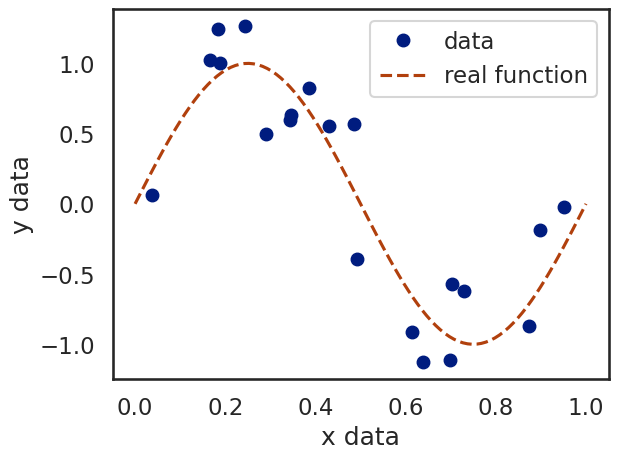

In [8]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

## Question 2

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
*   Fit this data using linear regression.
*   Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = 20
pf = PolynomialFeatures(degrees)
lr = LinearRegression()

In [12]:
X_data = data[['x']]
Y_data = data['y']

In [13]:
X_poly = pf.fit_transform(X_data)
lr.fit(X_poly, Y_data)

LinearRegression()

In [14]:
Y_pred = lr.predict(X_poly)

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

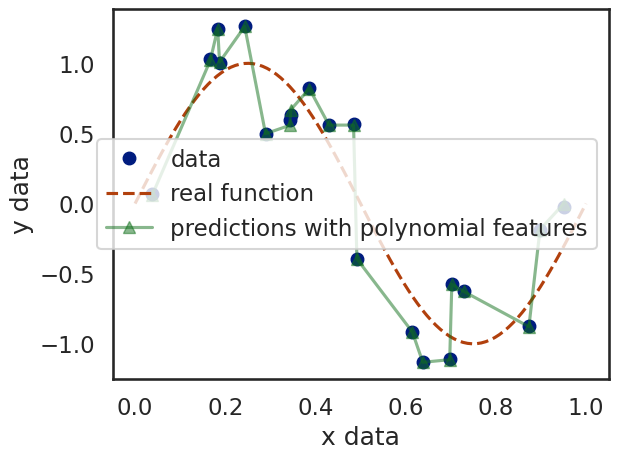

In [17]:
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions with polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

## Question 3

*   Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plot the results, as was done in Question 1.
*   Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?


In [19]:
from sklearn.linear_model import Ridge, Lasso

rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_r = rr.predict(X_poly)

In [20]:
ls = Lasso(alpha=0.0001)
ls = ls.fit(X_poly, Y_data)
Y_pred_ls = ls.predict(X_poly)

/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

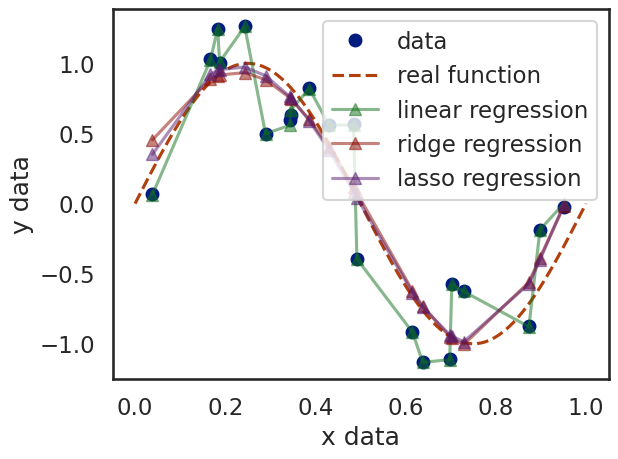

In [21]:
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_r, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_ls, label='lasso regression', marker='^', alpha=.5)
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')